# amazon

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval

In [2]:
def get_results(exp, path):
    all_cols = [ 'gain', 
       'shap_train', 'shap_test']
    our_cols = [ 'gain', 'permutation_train', 'permutation_test']
    cols = our_cols if exp.startswith('Ours') else all_cols
    df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
    results = pd.DataFrame()
    for col in cols:
        results[col] = pd.Series(df.loc[0,col])
    return results

paths = {
    'Lgbm' :"lgbm/lgbm_vanilla.csv",
    'Catboost' :"catboost/catboost_vanilla.csv",
    "Ours_kfold" :"ours_Kfold/ours_kfold__.csv",
     "Ours_Vanilla" :"ours_vanilla/ours_vanilla__.csv",
    "Sklearn_Mean_Imputing" : "sklearn/sklearn_mean_imputing.csv",
    'Xgboost_Mean_Imputing': "xgboost/xgboost_mean_imputing.csv",    
}

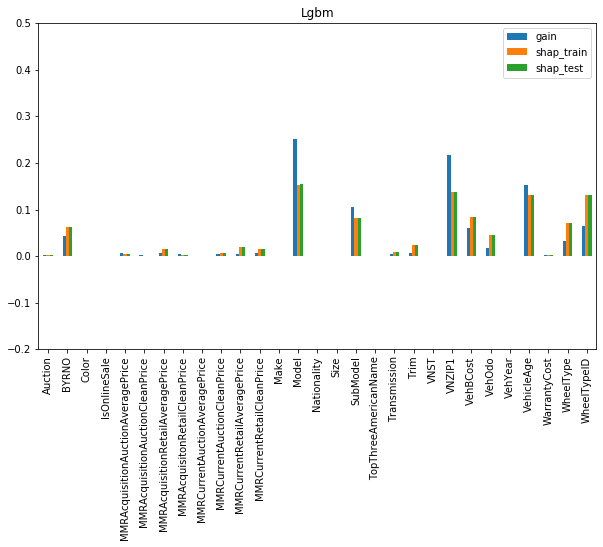

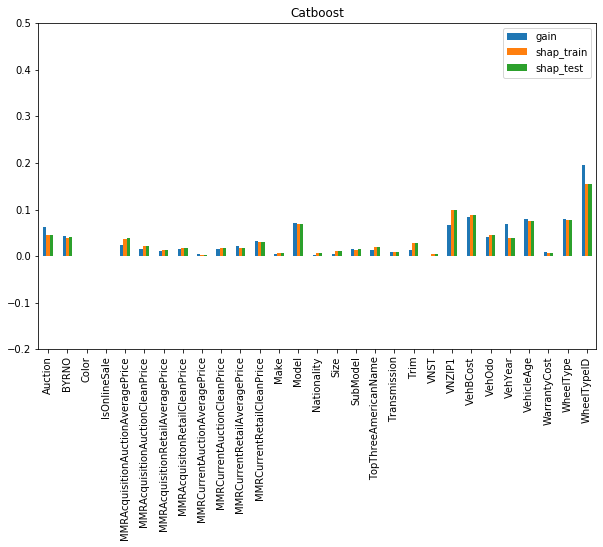

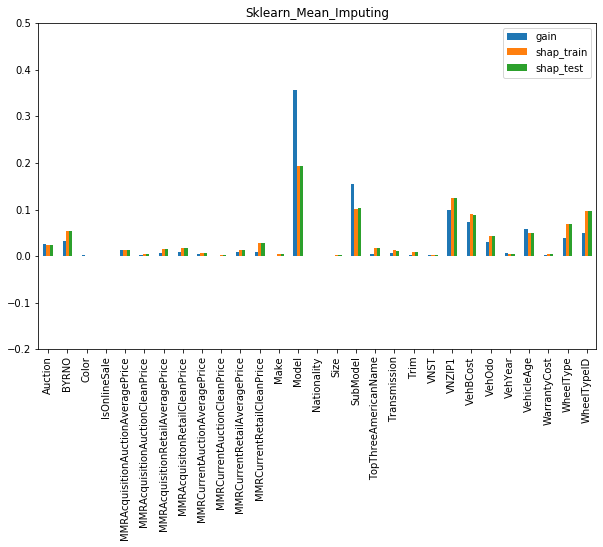

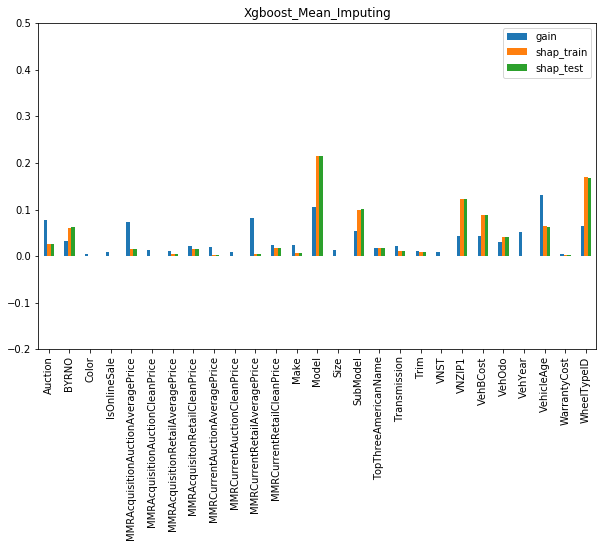

In [3]:
for k, v in paths.items():
    try: 
        results = get_results(k,v)
        results = results.sort_index()
        
#         results = results[['gain']]
        results.plot(kind = 'bar', figsize = (10,6), title = k, ylim = (-0.2,0.5))
        plt.plot()
    except:
        pass

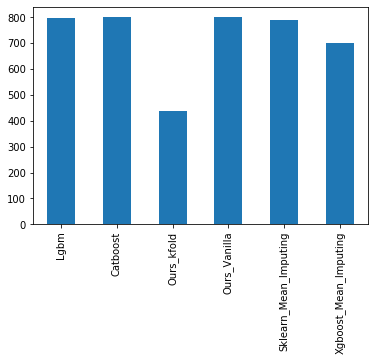

In [4]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['nleaves'][0]
pd.Series(results).plot(kind = 'bar')

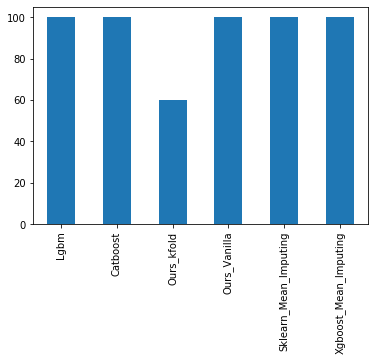

In [5]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['ntrees'][0]
pd.Series(results).plot(kind = 'bar')

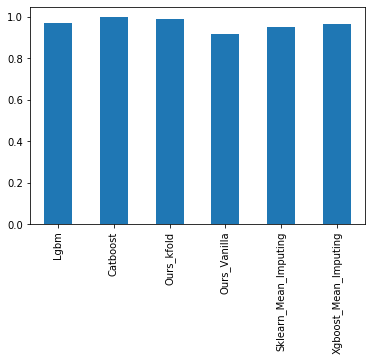

In [6]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['error'][0]
pd.Series(results).plot(kind = 'bar')

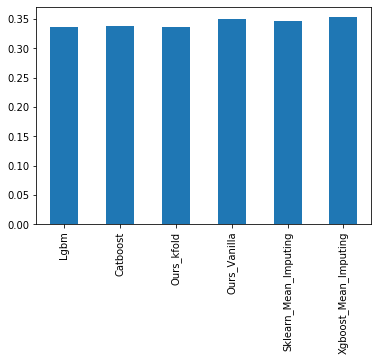

In [7]:
results = {}
for model, path in paths.items():
    results[model] = pd.read_csv(paths[model])['logloss'][0]
pd.Series(results).plot(kind = 'bar')

In [8]:
pd.Series(results)

Lgbm                     0.337119
Catboost                 0.337565
Ours_kfold               0.336440
Ours_Vanilla             0.350490
Sklearn_Mean_Imputing    0.347513
Xgboost_Mean_Imputing    0.353126
dtype: float64